In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('data_cleaning.csv')
df.head()

,Unnamed: 0,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,...,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,Luxury,PricePerSquareMeters,YearsOld
0,0,75523,3,0,1,63,9373,3,8,2005,...,4313,9005,956,0,7,7559081.5,Basic,0,100.089794,16
1,1,80771,39,1,1,98,39381,8,6,2015,...,3653,2436,128,1,2,8085989.5,Luxury,1,100.110058,6
2,2,55712,58,0,1,19,34457,6,8,2021,...,2937,8852,135,1,9,5574642.1,Basic,0,100.061784,0
3,3,32316,47,0,0,6,27939,10,4,2012,...,659,7141,359,0,3,3232561.2,Basic,0,100.029744,9
4,4,70429,19,1,1,90,38045,3,7,1990,...,8435,2429,292,1,4,7055052.0,Luxury,1,100.172543,31


0    8735
1    1265
Name: Luxury, dtype: int64


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Luxury', ylabel='count'>

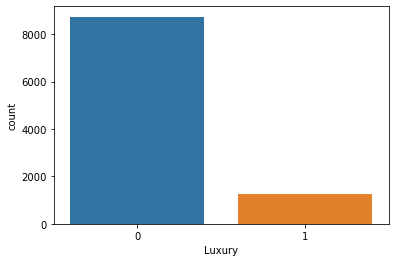

In [3]:
# Class imbalance
print(df.Luxury.value_counts())
sns.countplot(df.Luxury)

0    0.8735
1    0.1265
Name: Luxury, dtype: float64


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


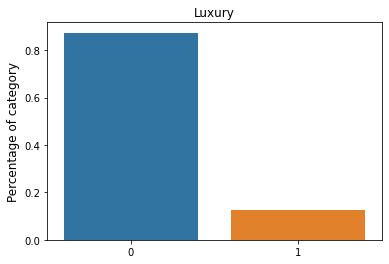

In [4]:
target = df.Luxury.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Luxury')
plt.ylabel('Percentage of category', fontsize=12);

In [5]:
df.columns

Index(['Unnamed: 0', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool',
       'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
       'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage',
       'hasStorageRoom', 'hasGuestRoom', 'price', 'category', 'Luxury',
       'PricePerSquareMeters', 'YearsOld'],
      dtype='object')

In [6]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test_sc)[:,1] >=threshold)
    category_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(category_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['basic', 'luxury'],
           yticklabels=['basic', 'luxury']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [7]:
import plotly.express as px
corr = df.corr()

corr['Luxury'].sort_values(ascending=False)

Luxury                  1.000000
hasPool                 0.382995
isNewBuilt              0.381237
hasYard                 0.373987
PricePerSquareMeters    0.033135
made                    0.005399
cityCode                0.003950
hasGuestRoom            0.003110
hasStorageRoom          0.002229
hasStormProtector       0.002182
numberOfRooms          -0.000442
garage                 -0.002218
cityPartRange          -0.003171
floors                 -0.003827
YearsOld               -0.005399
attic                  -0.005729
Unnamed: 0             -0.009246
basement               -0.011310
price                  -0.011399
squareMeters           -0.011800
numPrevOwners          -0.012843
Name: Luxury, dtype: float64

# Subset 1

In [8]:
# subset of features
subset_1 = df.loc[:,['Luxury','hasPool', 'isNewBuilt', 'hasYard']]
subset_1.head()

,Luxury,hasPool,isNewBuilt,hasYard
0,0,1,0,0
1,1,1,1,1
2,0,1,0,0
3,0,0,0,0
4,1,1,1,1


In [9]:
X, y = subset_1.drop(['Luxury'], axis=1), subset_1.Luxury

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)
lr_confusion = confusion_matrix(y_test, lr_pred)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [11]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
         roc_auc_lr)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000 
 ROC: 1.0000


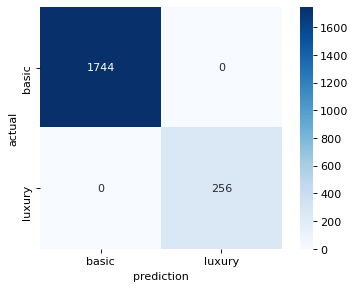

In [12]:
make_confusion_matrix(lr)

# Subset 2

In [13]:
subset_2 = df.loc[:,['Luxury','PricePerSquareMeters', 'made', 'hasGuestRoom',]]
subset_2.head()

,Luxury,PricePerSquareMeters,made,hasGuestRoom
0,0,100.089794,2005,7
1,1,100.110058,2015,2
2,0,100.061784,2021,9
3,0,100.029744,2012,3
4,1,100.172543,1990,4


In [14]:
X, y = subset_2.drop(['Luxury'], axis=1), subset_2.Luxury

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [15]:
lr2 = LogisticRegression(C=1000)
lr2.fit(X_train_sc, y_train)
lr2_pred = lr2.predict(X_test_sc)
lr2_confusion = confusion_matrix(y_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc, y_test)
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall = recall_score(y_test, lr2_pred)
lr2_f1 = f1_score(y_test, lr2_pred)

lr2_y_score = lr2.predict_proba(X_test_sc)[:,1]
lr2_fpr, lr2_tpr, lr2_auc_thresholds = roc_curve(y_test, lr2_y_score)
roc_auc_lr2 = auc(lr2_fpr, lr2_tpr)

print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1744
           1       0.00      0.00      0.00       256

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [16]:
print('Logistic Regression validation metrics with subset 2: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr2_ac, 
         lr2_precision, 
         lr2_recall,
         lr2_f1,
         roc_auc_lr2)
     )

Logistic Regression validation metrics with subset 2: 
 Accuracy: 0.8720 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000 
 ROC: 0.5167


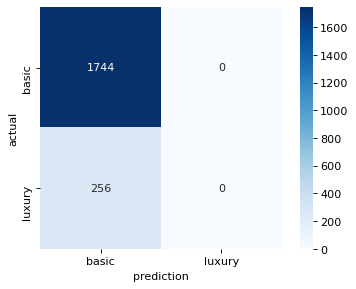

In [17]:
make_confusion_matrix(lr2)

# All features

In [18]:
X, y = df.drop(['Luxury','cityCode','Unnamed: 0','category'], axis=1), df.Luxury

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [19]:
lr3 = LogisticRegression(C=1000) 
lr3.fit(X_train_sc, y_train)
lr3_pred = lr3.predict(X_test_sc)
lr3_confusion = confusion_matrix(y_test, lr3_pred)

lr3_ac = lr3.score(X_test_sc, y_test)
lr3_precision = precision_score(y_test, lr3_pred)
lr3_recall = recall_score(y_test, lr3_pred)
lr3_f1 = f1_score(y_test, lr3_pred)

lr3_y_score = lr3.predict_proba(X_test_sc)[:,1]
lr3_fpr, lr3_tpr, lr3_auc_thresholds = roc_curve(y_test, lr3_y_score)
roc_auc_lr3 = auc(lr3_fpr, lr3_tpr)

print(classification_report(y_test, lr3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [20]:
print('Logistic Regression validation metrics with full dataset: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr3_ac, 
         lr3_precision, 
         lr3_recall,
         lr3_f1,
         roc_auc_lr3)
     )

Logistic Regression validation metrics with full dataset: 
 Accuracy: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000 
 ROC: 1.0000


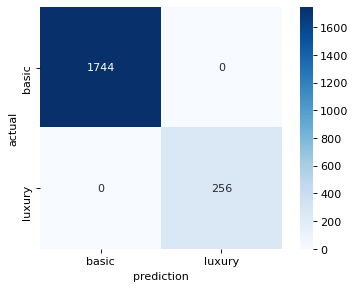

In [21]:
make_confusion_matrix(lr3)

# Subset 3- Feature Without 'hasPool', 'isNewBuilt', 'hasYard'

In [22]:
X, y = df.drop(['Luxury','cityCode','Unnamed: 0','category','hasPool', 'isNewBuilt', 'hasYard'], axis=1), df.Luxury

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
lr4 = LogisticRegression(C=1000) #no regularization
lr4.fit(X_train_sc, y_train)
lr4_pred = lr4.predict(X_test_sc)
lr4_confusion = confusion_matrix(y_test, lr4_pred)

lr4_ac = lr4.score(X_test_sc, y_test)
lr4_precision = precision_score(y_test, lr4_pred)
lr4_recall = recall_score(y_test, lr4_pred)
lr4_f1 = f1_score(y_test, lr4_pred)

lr4_y_score = lr4.predict_proba(X_test_sc)[:,1]
lr4_fpr, lr4_tpr, lr4_auc_thresholds = roc_curve(y_test, lr4_y_score)
roc_auc_lr4 = auc(lr4_fpr, lr4_tpr)

print(classification_report(y_test, lr4_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1744
           1       0.00      0.00      0.00       256

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [24]:
print('Logistic Regression validation metrics with Subset4: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr4_ac, 
         lr4_precision, 
         lr4_recall,
         lr4_f1,
         roc_auc_lr4)
     )

Logistic Regression validation metrics with Subset4: 
 Accuracy: 0.8720 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000 
 ROC: 0.8308


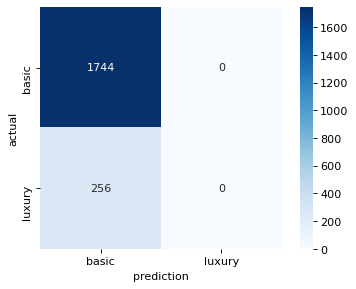

In [25]:
make_confusion_matrix(lr4)

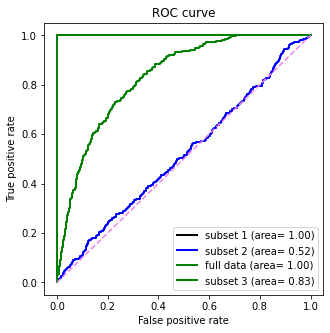

In [26]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='black', lw=lw, 
         label='subset 1 (area= %0.2f)' %roc_auc_lr)
plt.plot(lr2_fpr, lr2_tpr, color='blue', lw=lw, 
         label='subset 2 (area= %0.2f)' %roc_auc_lr2)
plt.plot(lr3_fpr, lr3_tpr, color='green', lw=lw, 
         label='full data (area= %0.2f)' %roc_auc_lr3)
plt.plot(lr4_fpr, lr4_tpr, color='green', lw=lw, 
         label='subset 3 (area= %0.2f)' %roc_auc_lr4)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right');